In [1]:
from scipy.stats import kendalltau
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import numpy as np
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

import seaborn as sb
sb.set(style='ticks', context='talk', palette='pastel')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Roboto Condensed']

from copia.estimators import diversity
from copia.data import to_copia_dataset
from copia.estimators import chao_shared

In [2]:
chivalry = pd.read_excel("../data/FR-DU.xlsx")
chivalry.sample(10)

,French work,Dutch work(s),french,dutch
239,Theseus de Cologne (Version en alexandrins),NaN,2,0
148,Le livre d'Artus,NaN,1,0
47,Continuation de Jérusalem,NaN,1,0
37,Buevon de Conmarchis (Adenet le Roi),NaN,1,0
229,NaN,Roman van Iechemas,0,1
30,Beuve de Hantone (Version continentale I),NaN,3,0
20,Aspremont,Roman van Aspremont [= Ongeïdentificeerd 5],20,1
3,NaN,"Alexandercompilatie [Antwerp, UL, MAG-P 64.19]",0,1
56,Elie de Saint Gilles,NaN,1,0
67,Floire et Blancheflor (Version I dite aristocr...,Floris ende Blancefloer; Floyris ende Blantseflur,4,3


In [3]:
display_df = chivalry.copy().fillna('')
display_df.columns = ['French work', 'Dutch work(s)', 'French attestations', 'Dutch attestations']
print(display_df.to_latex(index=False, escape=False, na_rep=''))

\begin{tabular}{llrr}
\toprule
French work & Dutch work(s) & French attestations & Dutch attestations \\
\midrule
Aimeri de Narbonne &  & 6 & 0 \\
Aiol & Limburgse Aiol (1); Vlaamse Aiol (2) & 1 & 2 \\
Aiquin &  & 1 & 0 \\
 & Alexandercompilatie [Antwerp, UL, MAG-P 64.19] & 0 & 1 \\
 & Alexanders geesten & 0 & 6 \\
Aliscans &  & 18 & 0 \\
Amadas et Ydoine &  & 2 & 0 \\
Ami et Amile (Version continentale en décasyllabes) &  & 1 & 0 \\
Ami et Amile (Version de Lille) &  & 1 & 0 \\
Ami et Amile (Version en alexandrins) &  & 5 & 0 \\
Ami et Amile (Version en prose du XIIIe s.) &  & 1 & 0 \\
Anseïs de Carthage &  & 7 & 0 \\
Anseïs de Gascogne &  & 5 & 0 \\
Apollonius de Tyr (version du XIIe siècle) &  & 1 & 0 \\
Apollonius de Tyr (version en prose I) &  & 1 & 0 \\
Apollonius de Tyr (version en prose II) &  & 5 & 0 \\
Apollonius de Tyr (version en prose III) &  & 1 & 0 \\
Apollonius de Tyr (version en prose III) &  & 1 & 0 \\
Apollonius de Tyr (version en prose V) &  & 1 & 0 \\
Artus de Bret

In [4]:
valid_data = chivalry[['french', 'dutch']].dropna()
print(len(valid_data))
tau, p_value = kendalltau(valid_data['french'], valid_data['dutch'])

# For a one-tailed test (i.e. directional: testing for *positive* correlation),
# we divide p-value by 2 if tau is positive, otherwise it's 1 - p_value/2
if tau > 0:
    p_value_one_tailed = p_value / 2
else:
    p_value_one_tailed = 1 - p_value / 2

print(f"Kendall's tau: {tau:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

258
Kendall's tau: -0.0969
One-tailed p-value: 0.9689


If we limit this test to works that survive in both languages, the effect grows somewhat stronger:

38
Kendall's tau: 0.2541
One-tailed p-value: 0.0214


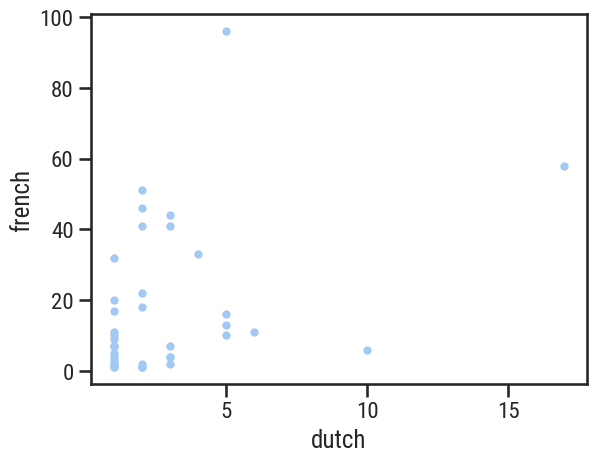

In [5]:
valid_data = chivalry[(chivalry['french'] >= 1) & (chivalry['dutch'] >= 1)]
tau, p_value = kendalltau(valid_data['french'], valid_data['dutch'])
print(len(valid_data))

if tau > 0:
    p_value_one_tailed = p_value / 2
else:
    p_value_one_tailed = 1 - p_value / 2

print(f"Kendall's tau: {tau:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

valid_data.plot.scatter('dutch', 'french');

## Table

In [6]:
chivalry['label'] = chivalry['French work'].fillna(chivalry['Dutch work(s)'])
chivalry

,French work,Dutch work(s),french,dutch,label
0,Aimeri de Narbonne,NaN,6,0,Aimeri de Narbonne
1,Aiol,Limburgse Aiol (1); Vlaamse Aiol (2),1,2,Aiol
2,Aiquin,NaN,1,0,Aiquin
3,NaN,"Alexandercompilatie [Antwerp, UL, MAG-P 64.19]",0,1,"Alexandercompilatie [Antwerp, UL, MAG-P 64.19]"
4,NaN,Alexanders geesten,0,6,Alexanders geesten
...,...,...,...,...,...
253,Yde et Olive,NaN,1,0,Yde et Olive
254,Yon ou la Vengeance Fromondin,NaN,1,0,Yon ou la Vengeance Fromondin
255,Yonnet de Metz (remaniement en vers),NaN,1,0,Yonnet de Metz (remaniement en vers)
256,Ysaïe le Triste,NaN,1,0,Ysaïe le Triste


In [7]:
du = to_copia_dataset(chivalry['dutch'], input_type='counts')
fr = to_copia_dataset(chivalry['french'], input_type='counts')
pooled = to_copia_dataset((chivalry['french'] + chivalry['dutch'])[chivalry['french'] + chivalry['dutch'] > 0].tolist(), input_type='counts')

du_div = diversity(du, method='chao1', CI=0.95, n_iter=1000)
fr_div = diversity(fr, method='chao1', CI=0.95, n_iter=1000)
pooled_div = diversity(pooled, method='chao1', CI=0.95, n_iter=1000)

stats = pd.DataFrame()
stats['Dutch'] = [du.f1, du.f2, du.S_obs, du.n, du_div['lci'], du_div['est'], du_div['uci'], du.S_obs / du_div['est']]
stats['French'] = [fr.f1, fr.f2, fr.S_obs, fr.n, fr_div['lci'], fr_div['est'], fr_div['uci'], fr.S_obs / fr_div['est']]
stats['Pooled'] = [pooled.f1, pooled.f2, pooled.S_obs, pooled.n, pooled_div['lci'], pooled_div['est'], pooled_div['uci'], pooled.S_obs / pooled_div['est']]
stats.index = ['$f_1$', '$f_2$', '$S_{obs}$', 'n', '(lci)', 'chao1', '(uci)', 'chao1(\%)']
stats

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

,Dutch,French,Pooled
$f_1$,39.000000,91.000000,110.000000
$f_2$,15.000000,21.000000,26.000000
$S_{obs}$,72.000000,224.000000,258.000000
n,170.000000,1579.000000,1749.000000
(lci),92.221479,351.091717,411.336911
chao1,122.401765,421.041799,490.559265
(uci),174.327378,520.956249,596.455966
chao1(\%),0.588227,0.532014,0.525930


In [8]:
print(stats.T.to_latex(
    label='tab:chivalry_diversity',
    caption='Diversity statistics for the chivalric corpus.',
    column_format='lccccccccc',
    escape=False,
    multicolumn=True,
    multicolumn_format='c',
    index_names=False,
    float_format="%.2f"
))

\begin{table}
\caption{Diversity statistics for the chivalric corpus.}
\label{tab:chivalry_diversity}
\begin{tabular}{lccccccccc}
\toprule
 & $f_1$ & $f_2$ & $S_{obs}$ & n & (lci) & chao1 & (uci) & chao1(\%) \\
\midrule
Dutch & 39.00 & 15.00 & 72.00 & 170.00 & 92.22 & 122.40 & 174.33 & 0.59 \\
French & 91.00 & 21.00 & 224.00 & 1579.00 & 351.09 & 421.04 & 520.96 & 0.53 \\
Pooled & 110.00 & 26.00 & 258.00 & 1749.00 & 411.34 & 490.56 & 596.46 & 0.53 \\
\bottomrule
\end{tabular}
\end{table}



Forest plot:

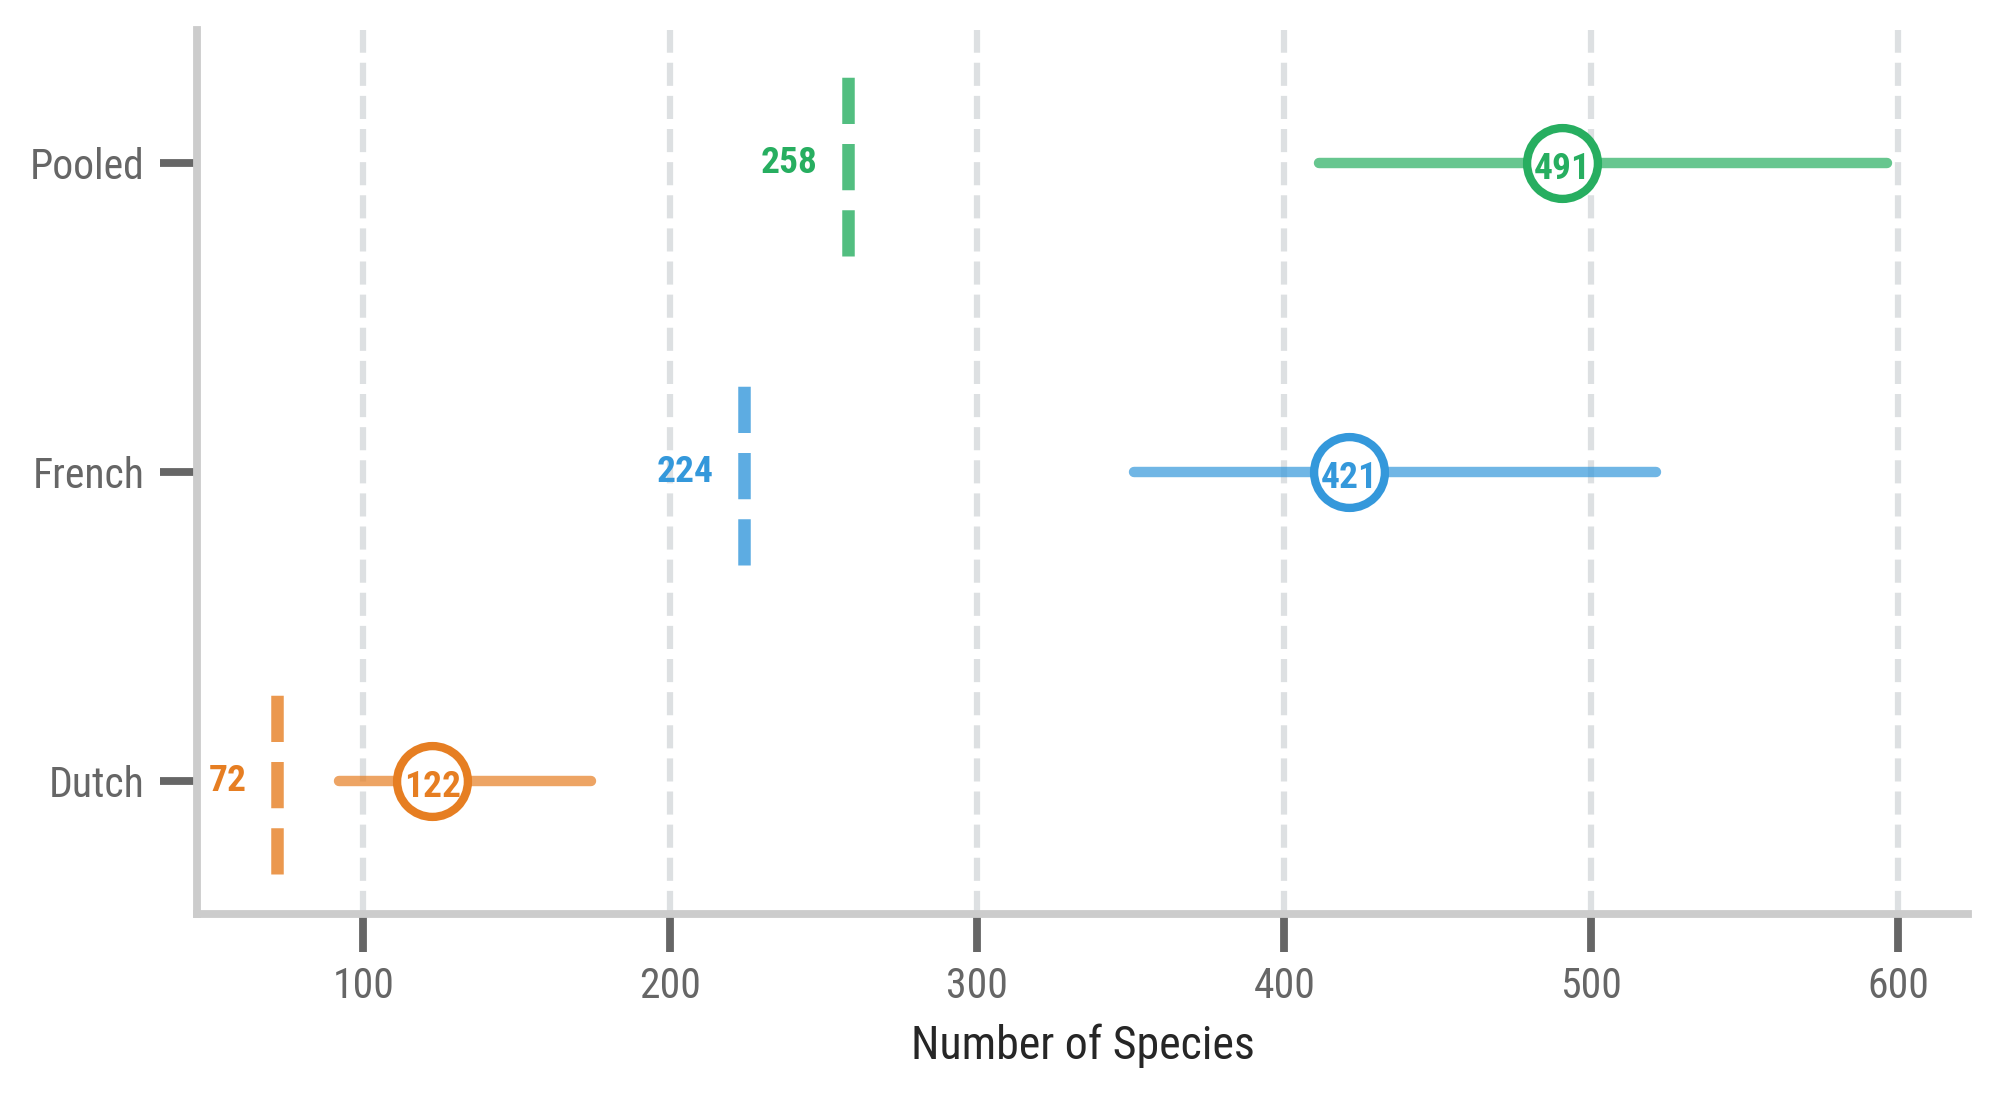

In [9]:
colors = ['#e67e22', '#3498db', '#27AE60']  # Dutch, French, Pooled
categories = ['Dutch', 'French', 'Pooled']

fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

for i, (cat, color) in enumerate(zip(categories, colors)):
    est = stats.loc['chao1', cat]
    lower = stats.loc['(lci)', cat]
    upper = stats.loc['(uci)', cat]
    obs = stats.loc['$S_{obs}$', cat]
    
    # Confidence interval lines:
    ax.plot([lower, upper], [i, i], '-', color=color, linewidth=2.5, 
            solid_capstyle='round', alpha=0.7)
    
    # Plot observed species as dashed line:
    ax.plot([obs, obs], [i-0.3, i+0.3], '--', color=color, linewidth=3, alpha=0.8)
    
    # Add observed species count label:
    ax.text(obs-10, i, f'{int(obs)}', ha='right', va='center', 
            color=color, fontsize=9, fontweight='bold')
    
    # Plot point estimate as circle:
    ax.plot(est, i, 'o', color=color, markersize=17, 
           markeredgewidth=2, markeredgecolor=color, 
           markerfacecolor='white')
    
    # Add value label
    ax.text(est, i-0.02, f'{int(round(est))}', ha='center', va='center', 
            color=color, fontsize=9, fontweight='bold')


ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.grid(True, axis='x', linestyle='--', alpha=0.5, color='#bdc3c7')
ax.set_xlabel('Number of Species', fontsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')
ax.tick_params(axis='both', labelsize=10, colors='#666666')

plt.tight_layout()
plt.savefig('chao1_forest.png', dpi=300, bbox_inches='tight')
plt.show()

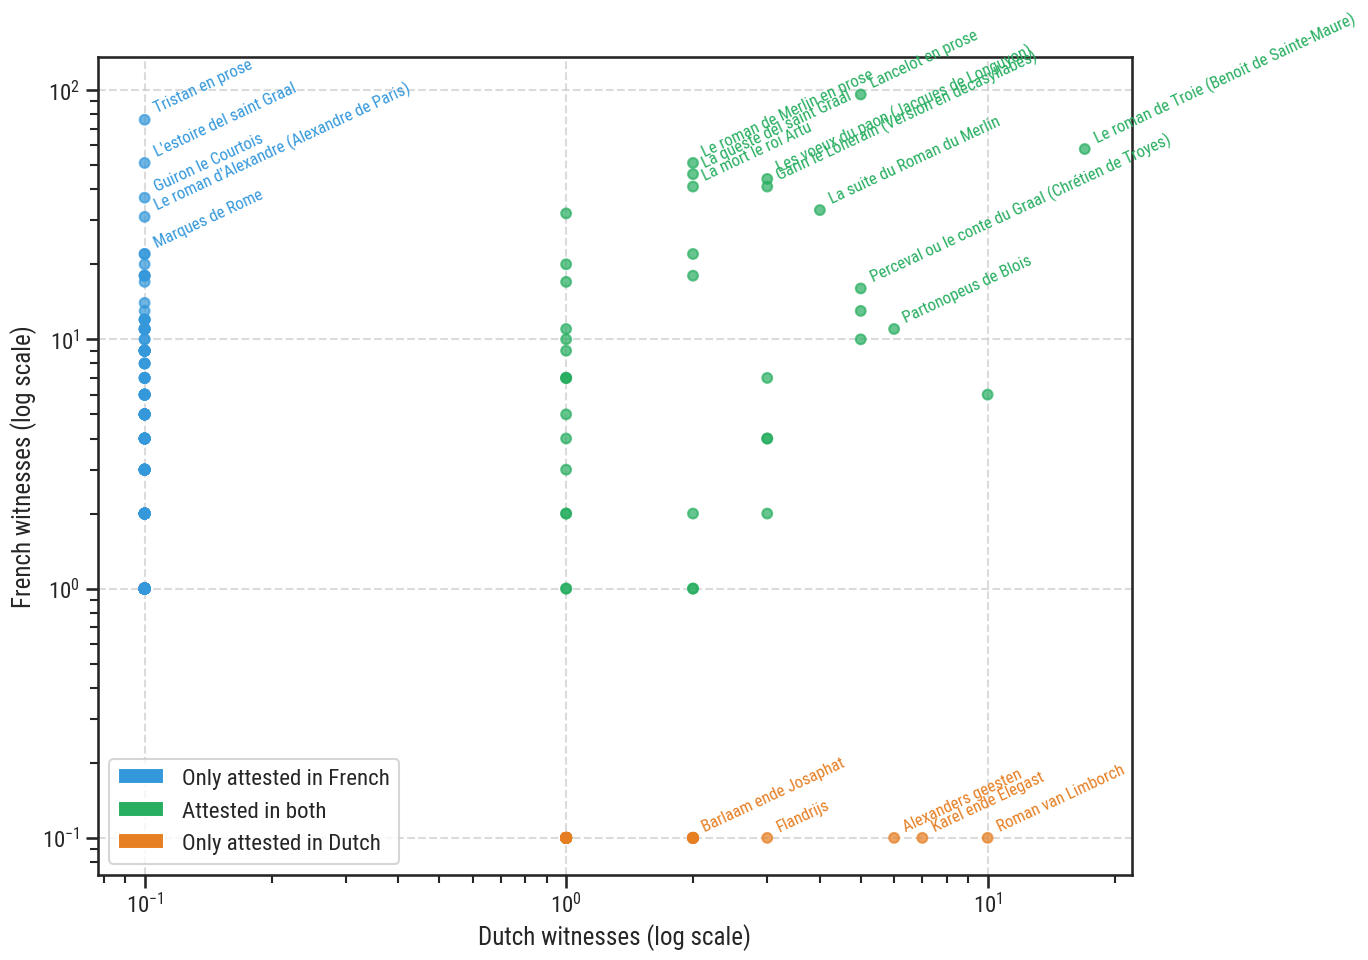

In [10]:
def get_titles_to_annotate(chivalry):
    french_only = chivalry[(chivalry['french'] > 0) & (chivalry['dutch'] == 0)]
    top_french_only = french_only.nlargest(5, 'french')
    
    dutch_only = chivalry[(chivalry['dutch'] > 0) & (chivalry['french'] == 0)]
    top_dutch_only = dutch_only.nlargest(5, 'dutch')
    
    combined = chivalry[(chivalry['dutch'] > 0) & (chivalry['french'] > 0)].copy()
    combined['total_score'] = combined['dutch'] * combined['french']
    top_combined = combined.nlargest(10, 'total_score')
    
    titles_to_annotate = pd.concat([top_french_only, top_dutch_only, top_combined]).drop_duplicates()
    
    return set(titles_to_annotate.index)

annotate_indices = get_titles_to_annotate(chivalry)

plt.figure(figsize=(14, 10))

colors = ['#e67e22', '#3498db', '#27AE60']  # Dutch, French, Both
point_colors = []
labels_legend = []
dutch_log = []
french_log = []
annotations = []

for idx, row in chivalry.iterrows():
    dutch_val = row['dutch'] if row['dutch'] > 0 else 0.1
    french_val = row['french'] if row['french'] > 0 else 0.1
    
    dutch_log.append(dutch_val)
    french_log.append(french_val)
    
    if idx in annotate_indices:
        annotations.append((dutch_val, french_val, row['label']))
    
    if row['dutch'] == 0:
        point_colors.append(colors[1])  # French only
        if 'Only attested in French' not in labels_legend:
            labels_legend.append('Only attested in French')
    elif row['french'] == 0:
        point_colors.append(colors[0])  # Dutch only
        if 'Only attested in Dutch' not in labels_legend:
            labels_legend.append('Only attested in Dutch')
    else:
        point_colors.append(colors[2])  # Both (Union)
        if 'Attested in both' not in labels_legend:
            labels_legend.append('Attested in both')

scatter = plt.scatter(dutch_log, french_log, c=point_colors, alpha=0.7, s=50)

for dutch_val, french_val, label in annotations:
    # Determine color based on the same logic as the dots
    idx = chivalry[chivalry['label'] == label].index[0]
    row = chivalry.loc[idx]
    
    if row['dutch'] == 0:
        text_color = colors[1]  # French only
    elif row['french'] == 0:
        text_color = colors[0]  # Dutch only
    else:
        text_color = colors[2]  # Both
    
    plt.annotate(label, (dutch_val, french_val), xytext=(5, 5),
                 fontsize=12, rotation=25, textcoords='offset points',
                 color=text_color)

plt.xscale('log')
plt.yscale('log')

legend_elements = []
color_map = {'Only attested in French': colors[1],
             'Only attested in Dutch': colors[0], 
             'Attested in both': colors[2]}

for label in labels_legend:
    legend_elements.append(Patch(facecolor=color_map[label], label=label))

plt.legend(handles=legend_elements, loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Dutch witnesses (log scale)')
plt.ylabel('French witnesses (log scale)')
plt.tight_layout()
plt.savefig('chivalry_scatter.png', bbox_inches='tight', dpi=300)
plt.show()

## Shared

In [11]:
s1 = to_copia_dataset(chivalry, data_type='abundance', input_type='counts',
                          index_column='label', count_column='french', remove_zeros=False)
s2 = to_copia_dataset(chivalry, data_type='abundance', input_type='counts',
                          index_column='label', count_column='dutch', remove_zeros=False)

In [12]:
len(s1.counts) == len(s2.counts)

True

In [13]:
results = chao_shared(s1, s2, CI=True, conf=.95,
                                       n_iter=1000, seed=57861)
results

{'total': 56.898103788697235,
 'obs_shared': 38.0,
 'unobs_shared': 18.89810378869724,
 'f0+': 1.998733375554148,
 'f+0': 15.905882352941177,
 'f00': 0.9934880602019148,
 'CI': {'total': {'lower': 44.84560234253085, 'upper': 164.69679543083856},
  'obs_shared': {'lower': 29.0, 'upper': 44.0},
  'unobs_shared': {'lower': 8.00873229675024, 'upper': 169.42780426926947},
  'f0+': {'lower': 3.1214593888537063, 'upper': 84.44648511716275},
  'f+0': {'lower': 4.142156862745098, 'upper': 60.14411764705883},
  'f00': {'lower': 0.7451160451514361, 'upper': 24.837201505047872}},
 'se': {'total': 32.46427229906043,
  'obs_shared': 3.709101836892106,
  'unobs_shared': 27.2353450460049,
  'f0+': 22.254400977487432,
  'f+0': 14.374662614514166,
  'f00': 6.314644220147226}}

In [14]:
data = {
        'name': ['total', 'obs_shared', 'unobs_shared', 'f0+', 'f+0', 'f00'],
        'Est': [
            results['total'],
            results['obs_shared'],
            results['unobs_shared'],
            results['f0+'],
            results['f+0'],
            results['f00'],
        ]
    }
    
if 'CI' in results:
        data['se'] = [
            results['se']['total'],
            results['se']['obs_shared'],
            results['se']['unobs_shared'],
            results['se']['f0+'],
            results['se']['f+0'],
            results['se']['f00'],
        ]
        data['95% LCL'] = [
            results['CI']['total']['lower'],
            results['CI']['obs_shared']['lower'],
            results['CI']['unobs_shared']['lower'],
            results['CI']['f0+']['lower'],
            results['CI']['f+0']['lower'],
            results['CI']['f00']['lower'],
        ]
        data['95% UCL'] = [
            results['CI']['total']['upper'],
            results['CI']['obs_shared']['upper'],
            results['CI']['unobs_shared']['upper'],
            results['CI']['f0+']['upper'],
            results['CI']['f+0']['upper'],
            results['CI']['f00']['upper'],
        ]
    
df = pd.DataFrame(data)
df

,name,Est,se,95% LCL,95% UCL
0,total,56.898104,32.464272,44.845602,164.696795
1,obs_shared,38.000000,3.709102,29.000000,44.000000
2,unobs_shared,18.898104,27.235345,8.008732,169.427804
3,f0+,1.998733,22.254401,3.121459,84.446485
4,f+0,15.905882,14.374663,4.142157,60.144118
5,f00,0.993488,6.314644,0.745116,24.837202


In [15]:
print(df.to_latex(
    index=False,
    float_format="%.2f",
    column_format='lcccccc',
    escape=False,
    label='tab:chao_shared',
    caption='Chao shared estimates for the chivalric corpus.',
    multicolumn=True,
    multicolumn_format='c',
    header=['Quantity', 'Estimate', 'SE', '95% LCL', '95% UCL']
))

\begin{table}
\caption{Chao shared estimates for the chivalric corpus.}
\label{tab:chao_shared}
\begin{tabular}{lcccccc}
\toprule
Quantity & Estimate & SE & 95% LCL & 95% UCL \\
\midrule
total & 56.90 & 32.46 & 44.85 & 164.70 \\
obs_shared & 38.00 & 3.71 & 29.00 & 44.00 \\
unobs_shared & 18.90 & 27.24 & 8.01 & 169.43 \\
f0+ & 2.00 & 22.25 & 3.12 & 84.45 \\
f+0 & 15.91 & 14.37 & 4.14 & 60.14 \\
f00 & 0.99 & 6.31 & 0.75 & 24.84 \\
\bottomrule
\end{tabular}
\end{table}



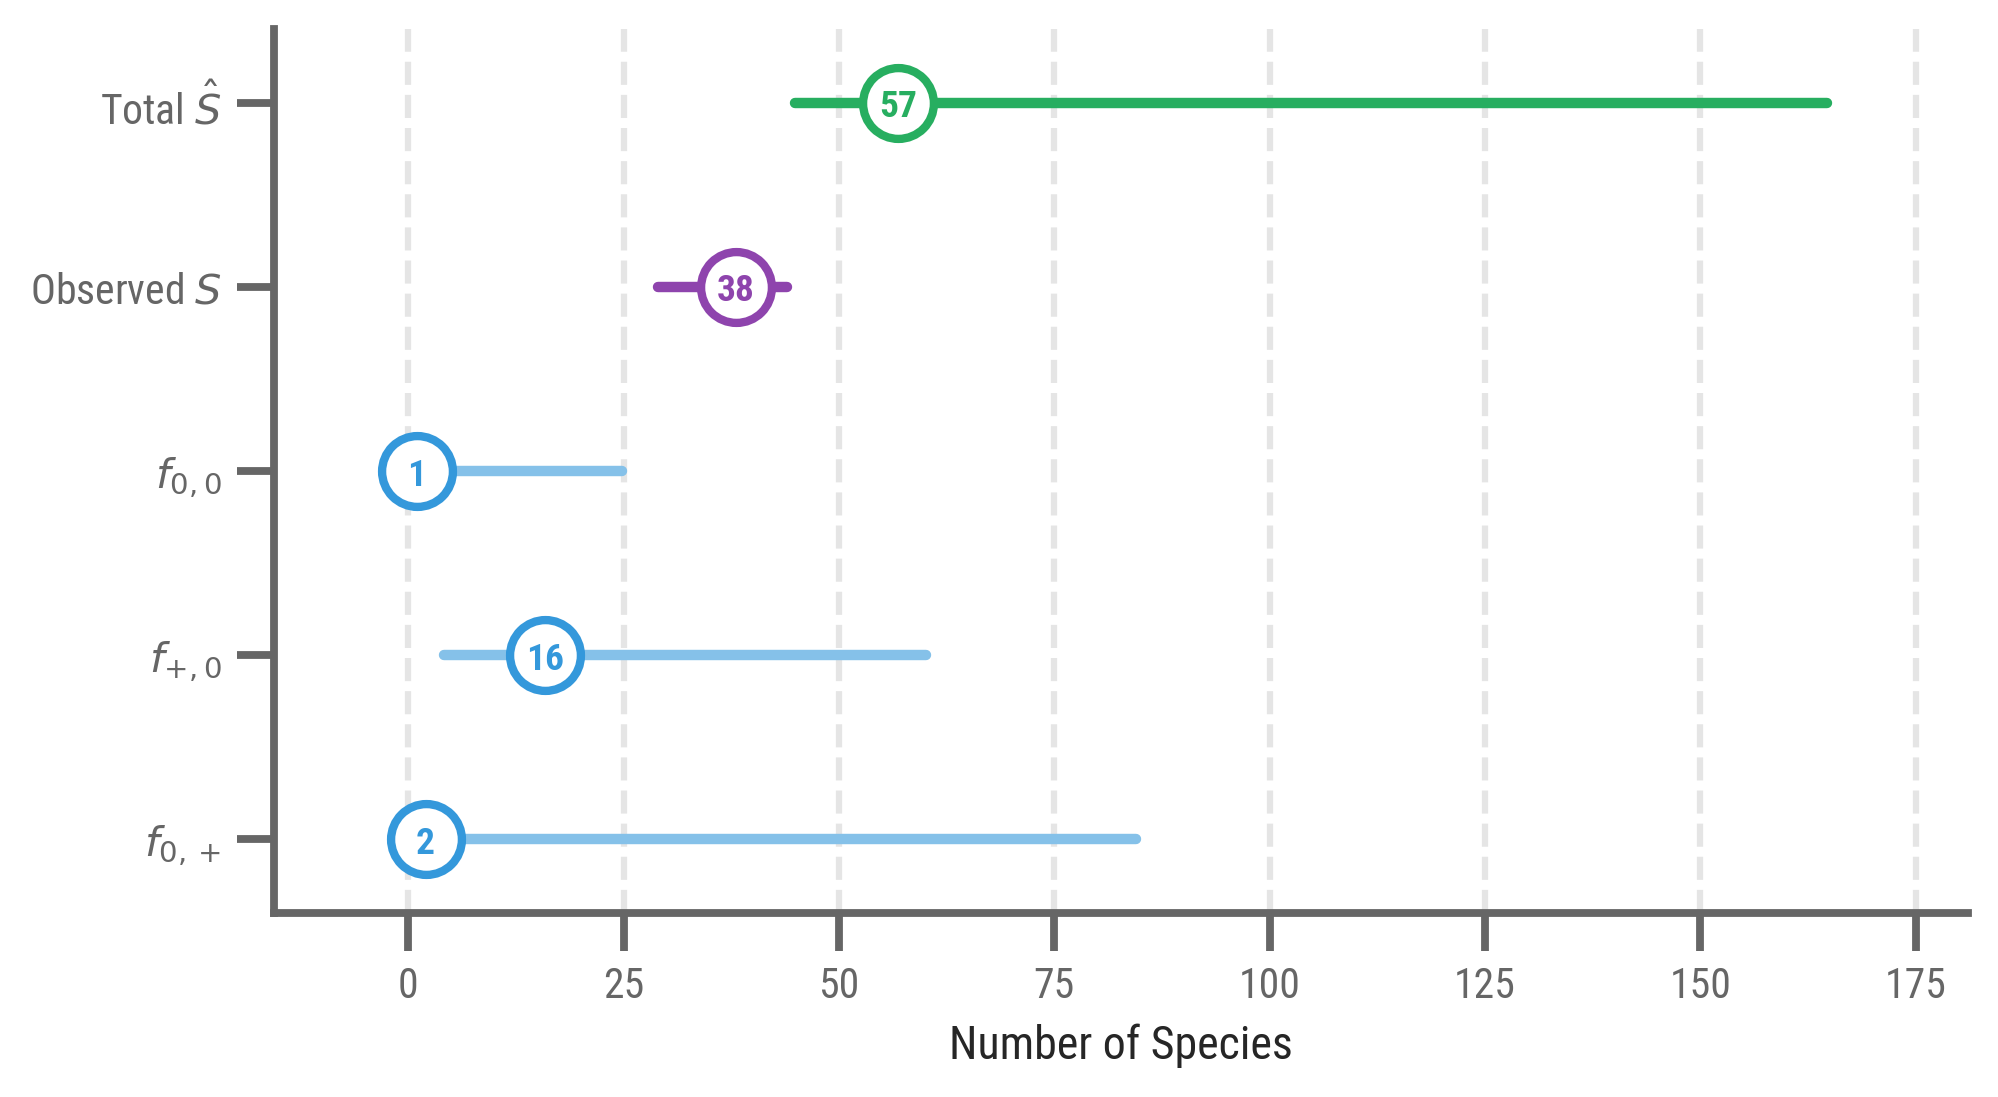

In [16]:
def plot_shared_species_forest(df, title=None):
    estimate_color = '#3498db'
    ci_color = '#85c1e9'
    observed_color = '#8E44AD'
    grid_color = '#cccccc'
    total_s_color = '#27AE60'
    
    fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    
    estimates = {
        '$f_{0,+}$': (df.loc[df['name'] == 'f0+', 'Est'].iloc[0],
                df.loc[df['name'] == 'f0+', '95% LCL'].iloc[0],
                df.loc[df['name'] == 'f0+', '95% UCL'].iloc[0]),
        '$f_{+,0}$': (df.loc[df['name'] == 'f+0', 'Est'].iloc[0],
                df.loc[df['name'] == 'f+0', '95% LCL'].iloc[0],
                df.loc[df['name'] == 'f+0', '95% UCL'].iloc[0]),
        '$f_{0,0}$': (df.loc[df['name'] == 'f00', 'Est'].iloc[0],
                df.loc[df['name'] == 'f00', '95% LCL'].iloc[0],
                df.loc[df['name'] == 'f00', '95% UCL'].iloc[0]),
        'Observed $S$': (df.loc[df['name'] == 'obs_shared', 'Est'].iloc[0],
                    df.loc[df['name'] == 'obs_shared', '95% LCL'].iloc[0],
                    df.loc[df['name'] == 'obs_shared', '95% UCL'].iloc[0]),
        'Total $\hat{S}$': (df.loc[df['name'] == 'total', 'Est'].iloc[0],
                   df.loc[df['name'] == 'total', '95% LCL'].iloc[0],
                   df.loc[df['name'] == 'total', '95% UCL'].iloc[0])
    }
    
    y_positions = range(len(estimates))
    for i, (name, (est, lower, upper)) in enumerate(estimates.items()):
        if name == 'Total $\hat{S}$':
            line_color = total_s_color
            marker_color = total_s_color
        elif name == 'Observed $S$':
            line_color = observed_color
            marker_color = observed_color
        else:
            line_color = ci_color
            marker_color = estimate_color
        
        ax.plot([lower, upper], [i, i], '-', color=line_color, linewidth=2.5, 
                solid_capstyle='round')
        
        ax.plot(est, i, 'o', color=marker_color, markersize=17, 
               markeredgewidth=2, markeredgecolor=marker_color, 
               markerfacecolor='white')
        
        ax.text(est, i-0.02, f'{int(round(est))}', ha='center', va='center', 
                color=marker_color, fontsize=9, fontweight='bold')
    
    ax.set_yticks(y_positions)
    ax.set_yticklabels(estimates.keys())
    ax.grid(True, axis='x', linestyle='--', alpha=0.5, color=grid_color)
    ax.margins(x=0.1, y=0.1)
    
    if title:
        ax.set_title(title, fontsize=12, pad=15)
    
    ax.set_xlabel('Number of Species', fontsize=11)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#666666')
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['bottom'].set_color('#666666')
    ax.tick_params(axis='both', labelsize=10, colors='#666666')
    
    ax.tick_params(axis='both', labelsize=10, colors='#666666')

    #ax.set_xlim(0, 120)
    
    plt.tight_layout()
    
    return fig, ax

fig, ax = plot_shared_species_forest(df)
plt.tight_layout()
plt.savefig('chao_shared_forest.png', dpi=300, bbox_inches='tight')
plt.show()
